In [1]:
!conda install --yes cartopy

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cart

In [3]:
df=pd.read_excel('new bd.xlsx')
df

,STATION,Latitude,Longitude,ICL,IH,IS,IPI,ICD,IFM,CONCLUSION
0,TUNIS-CARTHAGE,36.83,8.75,59.852006,2.154819,8.354,0.863577,1.232984,0.236757,DANGER FAIBLE
1,JENDOUBA,36.48,8.80,66.727054,2.554139,9.308,1.082824,1.631689,0.317294,DANGER FAIBLE
2,KAIROUAN,35.67,10.10,62.840617,2.334484,8.930,0.922924,1.412382,0.260977,DANGER FAIBLE
3,TOZEUR,34.00,8.17,77.914112,3.455747,9.398,2.694867,2.531652,0.896629,DANGER FAIBLE
4,GABES,33.95,10.04,44.778295,1.041283,7.616,0.228932,0.120750,0.048378,DANGER FAIBLE
5,JERBA,33.66,10.80,51.864360,1.345748,7.850,0.617102,0.424924,0.142751,DANGER FAIBLE
6,REMADA,32.32,10.40,74.800000,2.811851,9.596,2.183444,1.888967,0.665345,DANGER FAIBLE
7,TABARKA,36.95,8.75,69.763207,3.171181,9.236,1.080733,2.247643,0.346415,DANGER FAIBLE
8,BIZERTE,37.25,9.80,52.180562,1.587039,7.976,0.472101,0.665949,0.115690,DANGER FAIBLE
9,KELIBIA,36.88,11.08,43.810000,1.449296,7.562,0.112676,0.528362,0.026745,DANGER FAIBLE


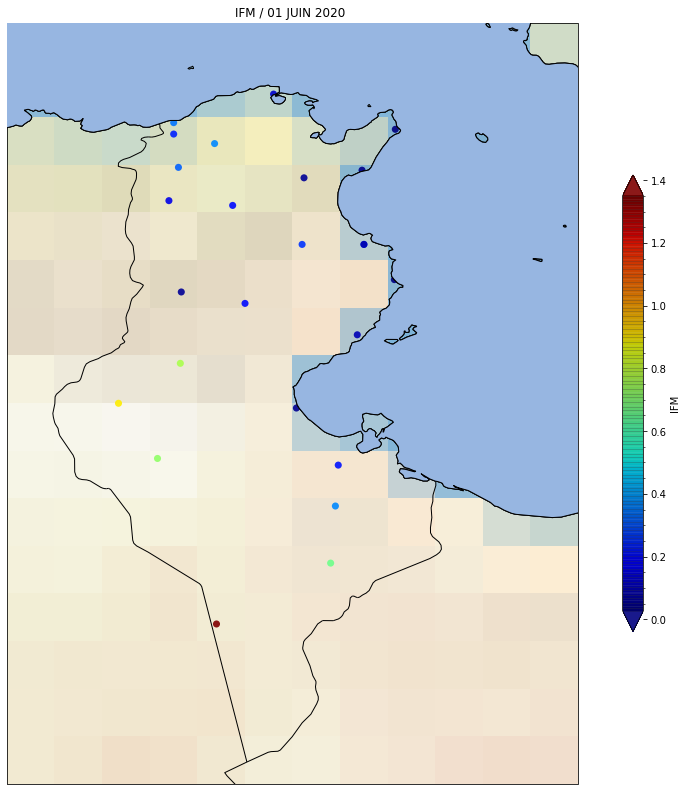

In [4]:
lat= df['Latitude'].values
lon= df['Longitude'].values
i=df['IFM'].values
fig = plt.figure(figsize=(16, 14))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([7, 13, 30, 38])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
ax.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.coastlines()
ax.stock_img()
#plt.scatter(lat, lon, i, cmap='terrain', linewidth=0, alpha=0.9, s=20)
plt.scatter(lon, lat, c=i, cmap='jet', linewidth=0, alpha=0.9, s=50)

plt.xlabel('longitude')
plt.ylabel('latitude')

plt.title('IFM / 01 JUIN 2020 ', fontsize=12)
cbar=plt.colorbar(label='IFM', shrink=0.6, drawedges='True', ticks=np.arange(0, 2, 0.2), extend='both')
cbar.minorticks_on()
#plt.clim(0, 10)
plt.show()
#fig.savefig('carte ifm.png')